In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Q1 calculations
p = .99
w = 1/3
k = np.log(1-p) / np.log(1-np.power(w,2))
k

39.098756118182145

# Q2
Read `LineDetection.jpg` (the image below)




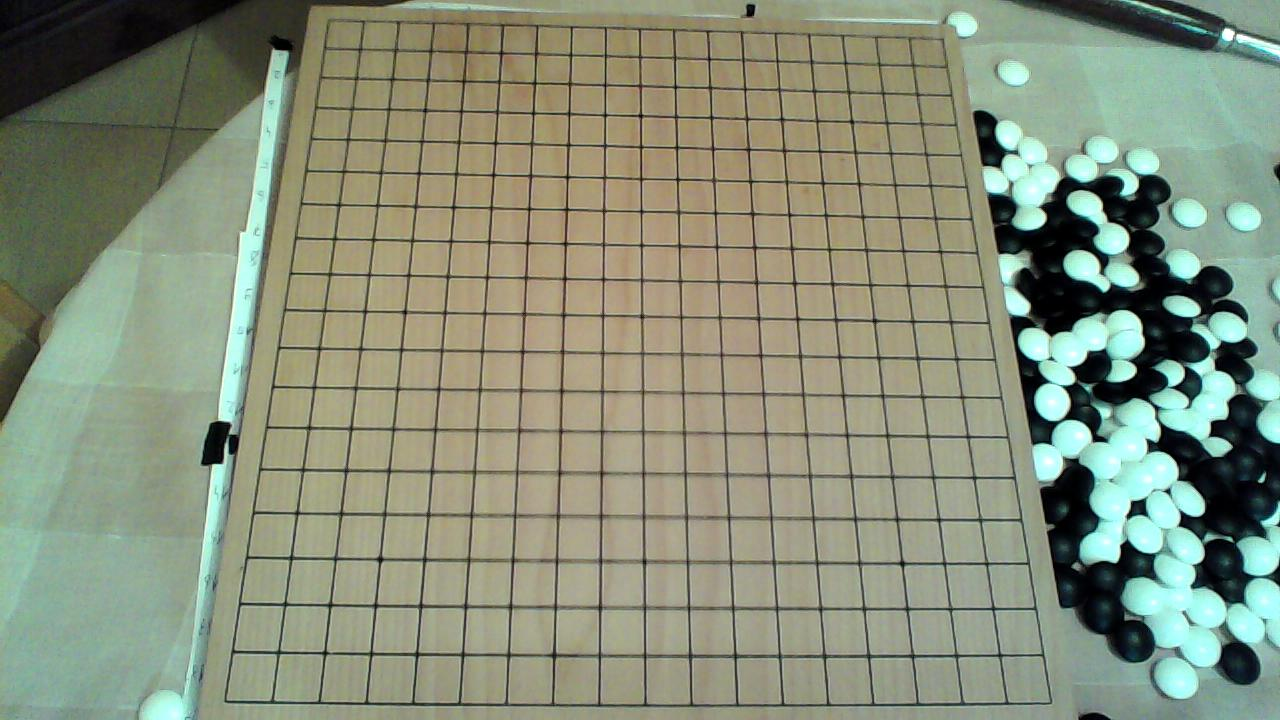

Use Hough to detect lines.

Note that you should consider the `Threshold`!

Here the threshold is `250`


In [ ]:
#TODO
im = cv2.imread('/content/LineDetection.jpg' , cv2.IMREAD_GRAYSCALE)

Here is a sample output:

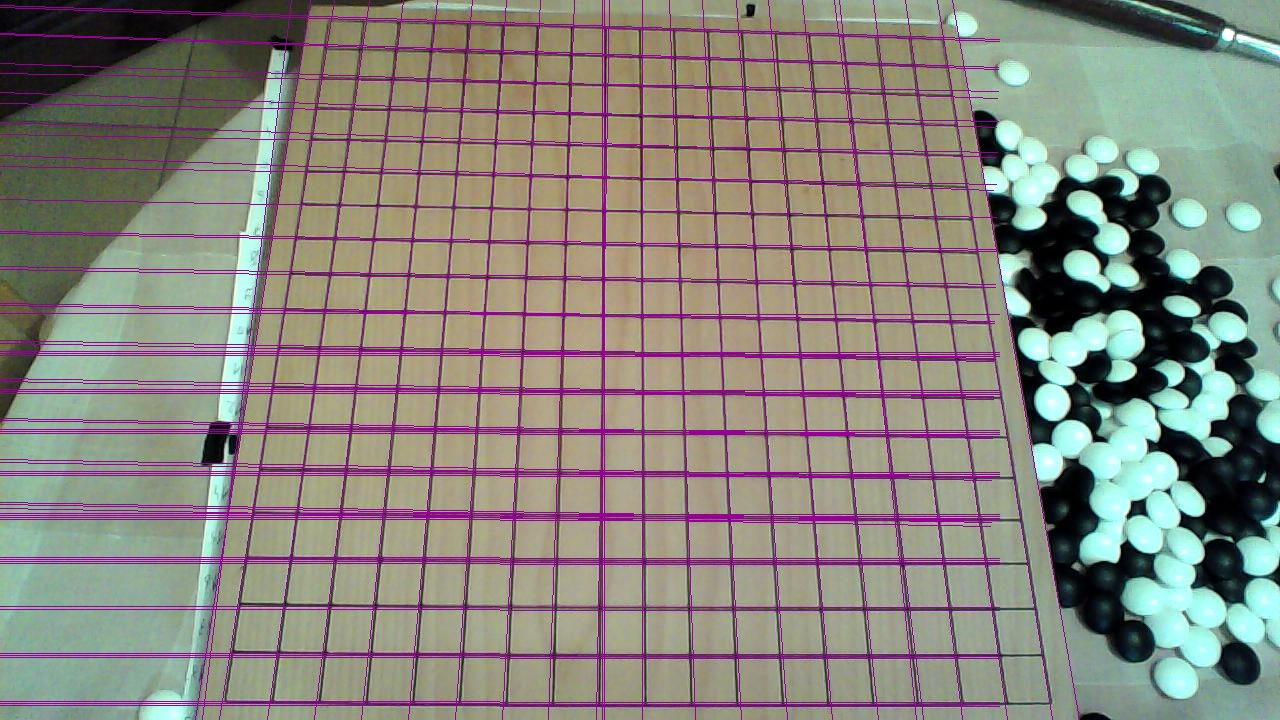

Now use *Probabilistic Hough Transform*. then, apply it to this picture.

In [ ]:
def extract_decart_points(line):
  rho = line[0][0]
  theta = line[0][1]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a * rho
  y0 = b * rho
  pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
  pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
  
  return pt1, pt2

In [ ]:
#TODO
import math

edges = cv2.Canny(im, 50, 200)
cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

def get_lines (edges, rho , tetha):

  lines = cv2.HoughLines(edges, rho, tetha, 250)

  if lines is not None:
    for line in lines:
        
        pt1, pt2 = extract_decart_points(line)
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

  return cdst

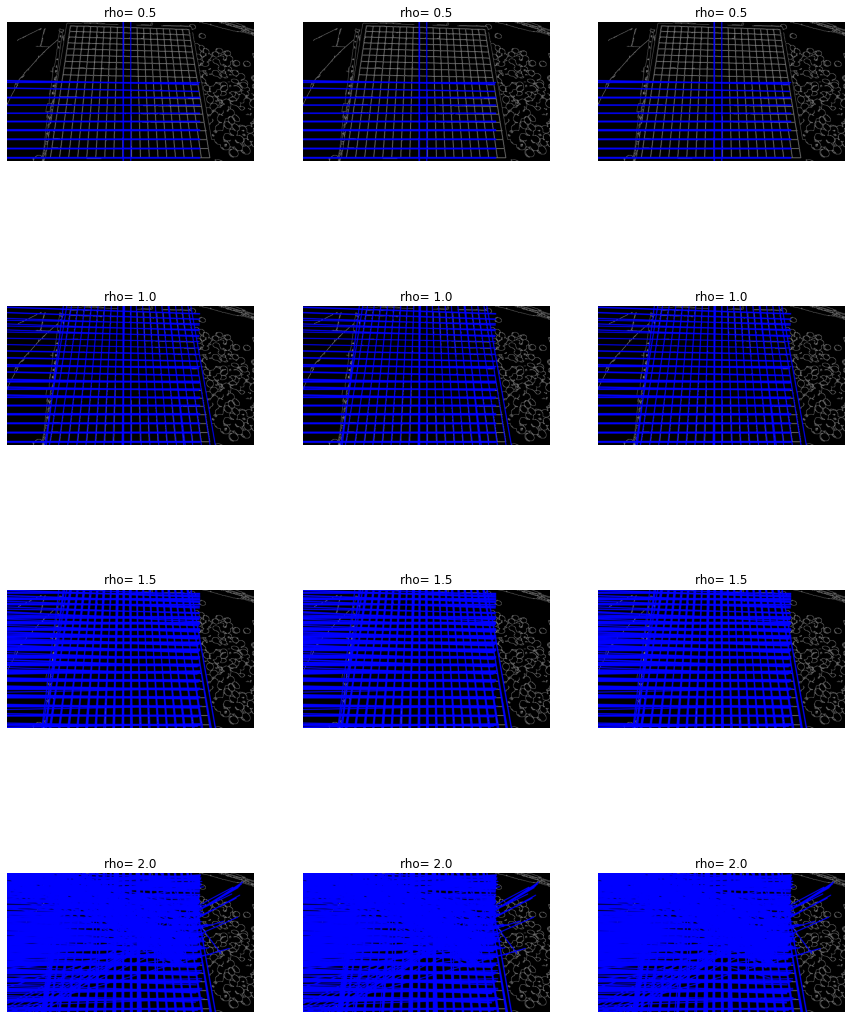

In [ ]:
LENGTH = 4
HEIGHT = 3
f, axarr = plt.subplots(LENGTH , HEIGHT , figsize=(15, 20))

for i in range(0,LENGTH):
  for j in range(0,HEIGHT):

    axarr[i,j].imshow(get_lines(edges , (i+1) * .5 , (j+1) * np.pi / 180))
    axarr[i,j].set_title("rho= " + str((i+1) * .5) )
    axarr[i,j].axis('off')

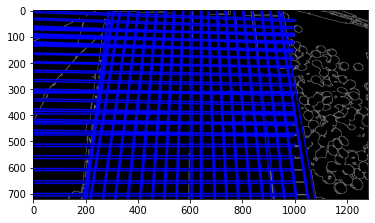

In [ ]:
best_lines = get_lines(edges , 1 , np.pi / 180)
plt.imshow(best_lines)

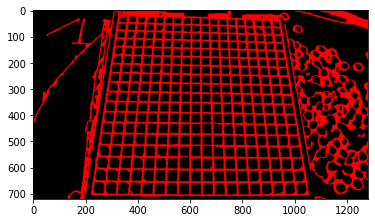

In [ ]:
edges = cv2.Canny(im, 50, 200)
cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 1 , minLineLength=0, maxLineGap=15)

# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(cdst, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Show result
plt.imshow(cdst)

Here is a sample output (Not the best one): 

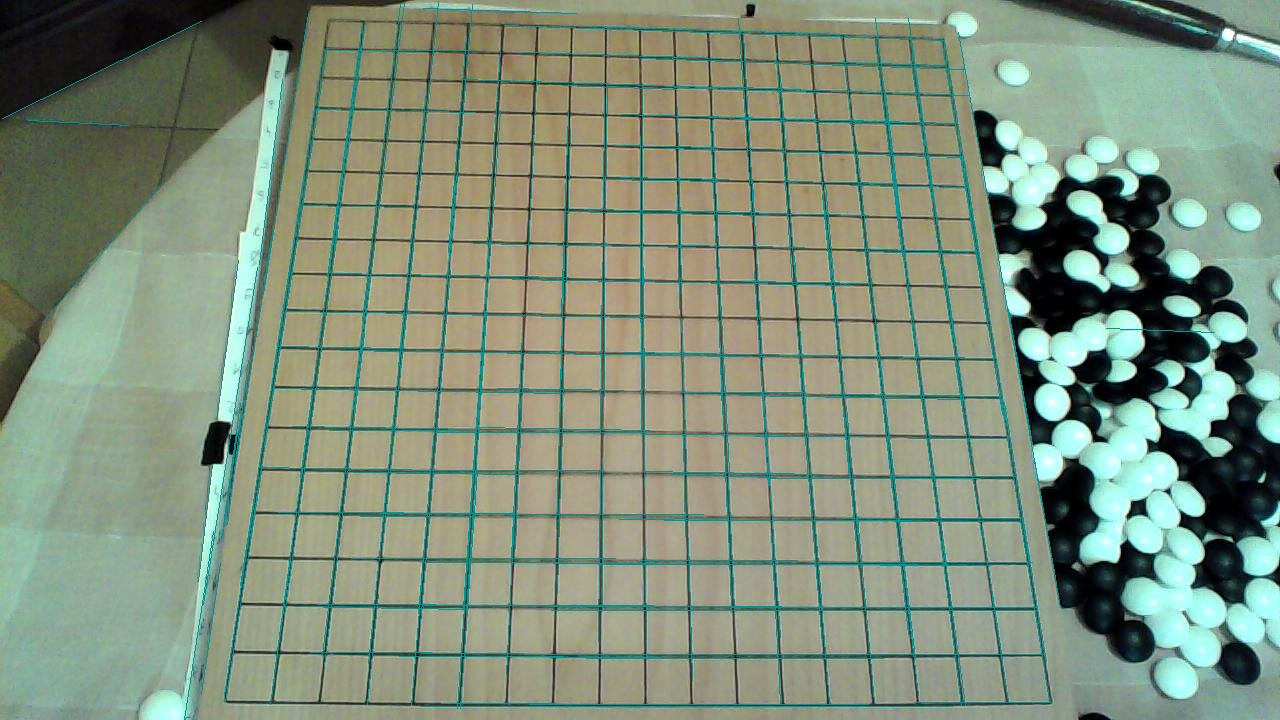

Note that you should find the optimum amount of parameters which are used in this algorithm.

In [ ]:
# Hough implementation
edges = cv2.Canny(im, 50, 200)
cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

width,height = edges.shape

# Defining accumulator
diag_len = int(round(math.sqrt(width * width + height * height)))
rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

accumulator = np.zeros((2 * diag_len, 180), dtype=np.uint8)

for i in range(width):
  for j in range(height):
    if edges[i,j] < 128 :
      continue
    
    for tetha in range(0,180):
      rho = i * np.cos(tetha) + j * np.sin(tetha)
      accumulator[rho , tetha] += 1
  

# Q3

What does this cell of code do? Explain the algorithm.

Then Compare it with the results of the previous part.

In [ ]:
img = cv2.imread("/content/LineDetection.jpg",0)
imgcolorous = cv2.imread("/content/LineDetection.jpg")
UNKNOWN = cv2.createLineSegmentDetector(0)
lines = UNKNOWN.detect(img)[0]
drawn_img = UNKNOWN.drawSegments(imgcolorous,lines)
cv2.imwrite('UNKNOWN.jpg',drawn_img)

True

# Q4

In the cells below you should define two functions that one of them covert RGB to CMYK and another one Convert them vice versa. 

In [ ]:
def rgb_to_cmyk(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):

  #TODO
  r /= RGB_SCALE
  g /= RGB_SCALE
  b /= RGB_SCALE

  k = 1 - np.max((r,g,b))

  colors = np.full(3 , 1-k) - [r,g,b]
  colors *= CMYK_SCALE
  
  c,m,y = colors.astype(int)

  return c, m, y, (k * CMYK_SCALE).astype(int)

In [ ]:
rgb_to_cmyk(25, 56, 25)

(55, 0, 55, 78)

Expected Output: (55, 0, 55, 78)

In [ ]:
def cmyk_to_rgb(c, m, y, k, CMYK_SCALE = 100, RGB_SCALE = 255):

  #TODO
  c,m,y,k = np.array([c,m,y,k])/ CMYK_SCALE

  colors = np.array([c,m,y])
  colors = colors * (1-k)
  colors = 1 - k - colors
  colors *= RGB_SCALE
  colors = colors.astype(int)

  r,g,b = colors

  return r, g, b

In [ ]:
cmyk_to_rgb(55, 0, 55, 78)

array([25, 56, 25])

Expected Output: (25, 56, 25)

# Q5
Compute the HSI parametes and V, L and Y according to lectures.

In [ ]:
def compute_h(r,g,b):
  h_surat = r-g + r - b
  h_makhraj = np.power((r-g),2) + (r-b)*(g-b)
  h_makhraj = np.sqrt(h_makhraj)
  h_makhraj *= 2

  h = h_surat / h_makhraj
  h = np.arccos(h)

  return h


In [ ]:
#TODO 
colors = np.array([150,65,200])
H = compute_h(150,65,200)
S = 1 - 3 * np.min(colors) / np.sum(colors)
I = np.average(colors)
V = np.max(colors)
L = (np.max(colors) + np.min(colors))/2
Y = 0.299*colors[0] + 0.587*colors[1] + 0.114*colors[2]

print("H: ", H)
print("S: ", S)
print("I: ", I)
print("V: " , V)
print("L: " , L)
print("Y: " , Y)

H:  1.422216023754124
S:  0.5301204819277108
I:  138.33333333333334
V:  200
L:  132.5
Y:  105.80499999999999


# Good Luck!